In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import statsmodels.api as sm
import statsmodels.formula.api as smf
from math import sqrt

In [5]:
# 3-3-1
url = "https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv"
df = pd.read_csv(url)
df.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
# Informations sur les colonnes et types de données
print("Informations sur les colonnes et types de données :")
df.info()

# Statistiques descriptives des colonnes numériques
print("\nStatistiques descriptives des colonnes numériques :")
df.describe()


Informations sur les colonnes et types de données :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB

Statistiques descriptives des colonnes numériques :


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
# Vérification des valeurs manquantes
print("Nombre de valeurs manquantes par colonne :")
df.isnull().sum()


Nombre de valeurs manquantes par colonne :


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

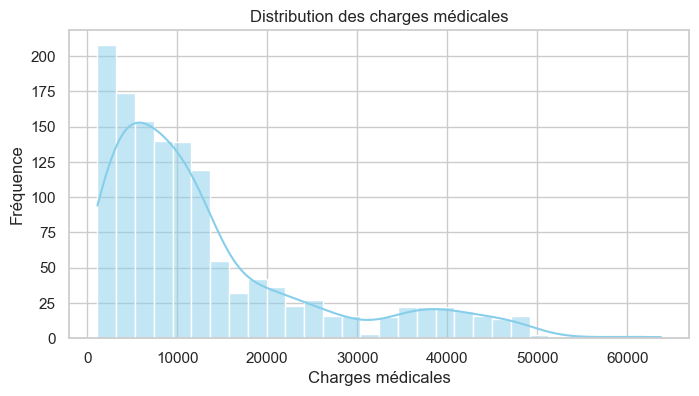

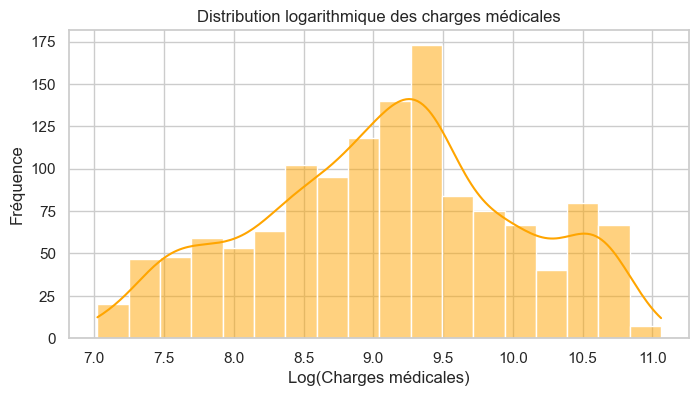

In [8]:
#3-3-2

# Distribution des charges médicales
plt.figure(figsize=(8, 4))
sns.histplot(df['charges'], kde=True, color='skyblue')
plt.title('Distribution des charges médicales')
plt.xlabel('Charges médicales')
plt.ylabel('Fréquence')
plt.show()

# Distribution logarithmique des charges (pour réduire l'asymétrie)
# On filtre au cas où charges <= 0
charges_positive = df['charges'][df['charges'] > 0]

plt.figure(figsize=(8, 4))
sns.histplot(np.log(charges_positive), kde=True, color='orange')
plt.title('Distribution logarithmique des charges médicales')
plt.xlabel('Log(Charges médicales)')
plt.ylabel('Fréquence')
plt.show()


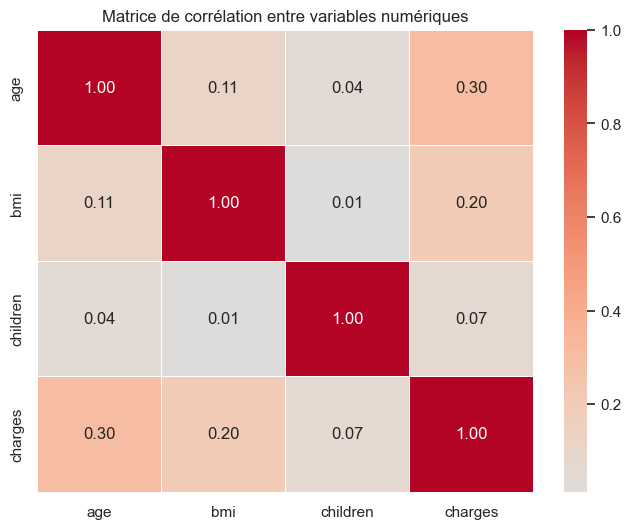

In [9]:
# 3-3-3
#Corrélation entre variables numériques
# Sélection des colonnes numériques
numeric_cols = df.select_dtypes(include=[np.number]).columns

# Calcul de la matrice de corrélation
correlation = df[numeric_cols].corr()

# Heatmap de corrélation
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, fmt=".2f", cmap='coolwarm', center=0, linewidths=0.5)
plt.title('Matrice de corrélation entre variables numériques')
plt.show()

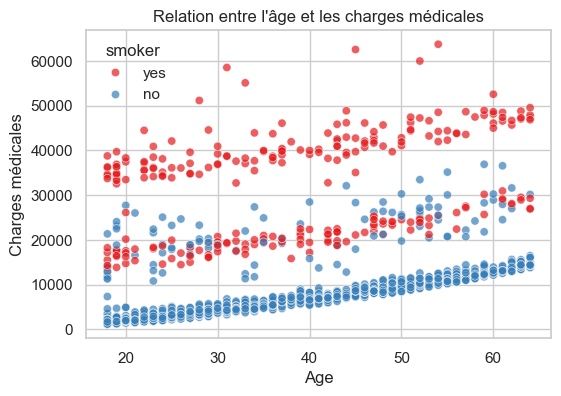

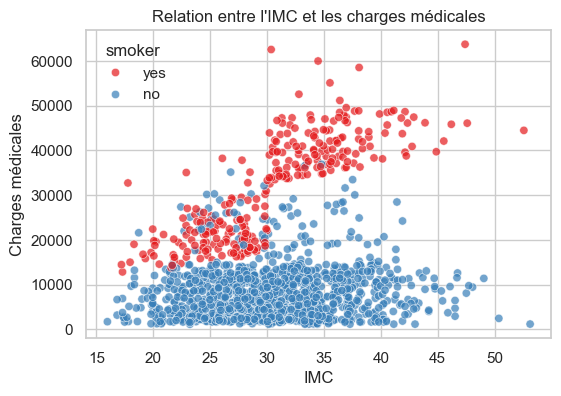

In [10]:
#3-3-4
# Analyse de l’impact de chaque variable (âge, IMC, statut fumeur, région, nombre d’enfants)

# Relation entre l’âge et les charges
plt.figure(figsize=(6, 4))
sns.scatterplot(x="age", y="charges", data=df, hue='smoker', palette='Set1', alpha=0.7)
plt.title("Relation entre l'âge et les charges médicales")
plt.xlabel('Age')
plt.ylabel('Charges médicales')
plt.show()

# Relation entre l’IMC et les charges
plt.figure(figsize=(6, 4))
sns.scatterplot(x="bmi", y="charges", data=df, hue='smoker', palette='Set1', alpha=0.7)
plt.title("Relation entre l'IMC et les charges médicales")
plt.xlabel('IMC')
plt.ylabel('Charges médicales')
plt.show()


/var/folders/3c/xsgbywt544n50tsfl_r0wpnr0000gn/T/ipykernel_30784/1220884081.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='smoker', y='charges', data=df, palette='Set2', ci=None)
/var/folders/3c/xsgbywt544n50tsfl_r0wpnr0000gn/T/ipykernel_30784/1220884081.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='smoker', y='charges', data=df, palette='Set2', ci=None)


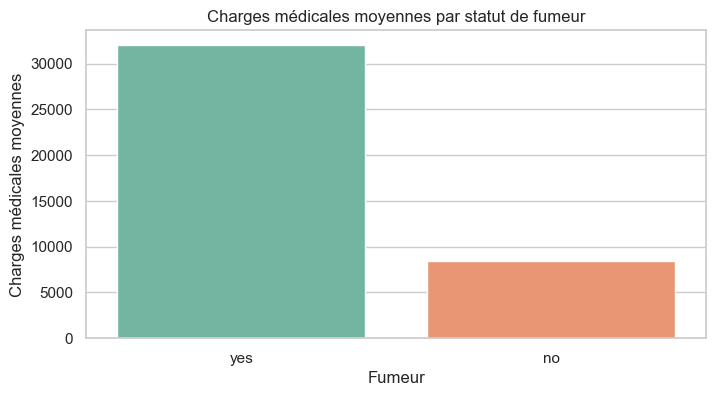

/var/folders/3c/xsgbywt544n50tsfl_r0wpnr0000gn/T/ipykernel_30784/1220884081.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='region', y='charges', data=df, palette='Set3', ci=None)
/var/folders/3c/xsgbywt544n50tsfl_r0wpnr0000gn/T/ipykernel_30784/1220884081.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='region', y='charges', data=df, palette='Set3', ci=None)


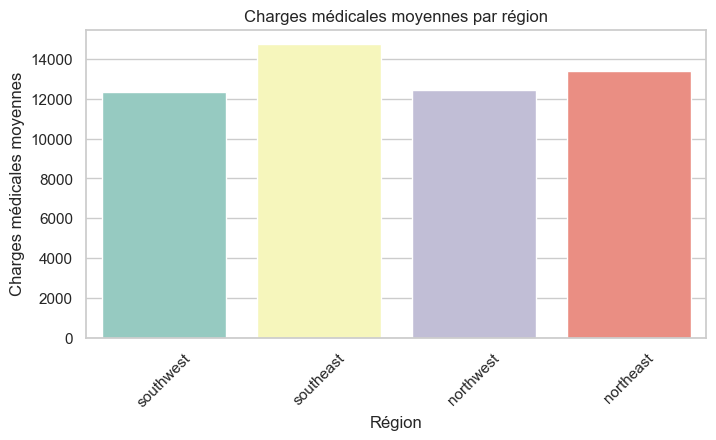

/var/folders/3c/xsgbywt544n50tsfl_r0wpnr0000gn/T/ipykernel_30784/1220884081.py:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='children', y='charges', data=df, palette='Set1', ci=None)
/var/folders/3c/xsgbywt544n50tsfl_r0wpnr0000gn/T/ipykernel_30784/1220884081.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='children', y='charges', data=df, palette='Set1', ci=None)


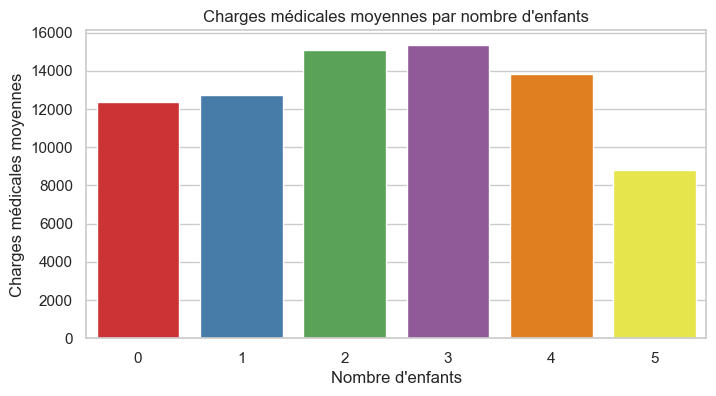

In [11]:
# Tarification

## 1. Charges moyennes par statut de fumeur
plt.figure(figsize=(8, 4))
sns.barplot(x='smoker', y='charges', data=df, palette='Set2', ci=None)
plt.title('Charges médicales moyennes par statut de fumeur')
plt.xlabel('Fumeur')
plt.ylabel('Charges médicales moyennes')
plt.show()

## 2. Charges moyennes par région
plt.figure(figsize=(8, 4))
sns.barplot(x='region', y='charges', data=df, palette='Set3', ci=None)
plt.title('Charges médicales moyennes par région')
plt.xlabel('Région')
plt.ylabel('Charges médicales moyennes')
plt.xticks(rotation=45)
plt.show()

## 3. Charges moyennes par nombre d'enfants
plt.figure(figsize=(8, 4))
sns.barplot(x='children', y='charges', data=df, palette='Set1', ci=None)
plt.title("Charges médicales moyennes par nombre d'enfants")
plt.xlabel("Nombre d'enfants")
plt.ylabel('Charges médicales moyennes')
plt.show()


In [12]:
#3-3-5
## Préparation des données pour la modélisation

# Conversion des variables catégorielles
df_encoded = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)

# Séparation des variables indépendantes et dépendantes
X = df_encoded.drop('charges', axis=1)
y = df_encoded['charges']

# Division des données en ensembles d'entraînement et de test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Dimensions de l'ensemble d'entraînement: ", X_train.shape)
print("Dimensions de l'ensemble de test: ", X_test.shape)

Dimensions de l'ensemble d'entraînement:  (1070, 8)
Dimensions de l'ensemble de test:  (268, 8)


In [13]:
## Modèle 1: Régression linéaire simple (avec l'âge comme seule variable prédictive)

# Préparation des données pour la régression simple
# On sélectionne 'age' comme seule variable prédictive
X_simple_train = X_train[['age']]  # garder le format DataFrame
X_simple_test = X_test[['age']]

# Entraînement du modèle de régression linéaire simple
model_simple = LinearRegression()
model_simple.fit(X_simple_train, y_train)

# Prédictions sur l'ensemble de test
y_pred_simple = model_simple.predict(X_simple_test)

In [14]:
# Évaluation du modèle simple
mse_simple = mean_squared_error(y_test, y_pred_simple)
rmse_simple = sqrt(mse_simple)
r2_simple = r2_score(y_test, y_pred_simple)

# Affichage des résultats
print("\n=== Résultats du modèle de régression linéaire simple (avec l'âge uniquement) ===")
print(f"Coefficient (pente): {model_simple.coef_[0]:.2f}")
print(f"Constante (ordonnée à l'origine): {model_simple.intercept_:.2f}")
print(f"R² (coefficient de détermination): {r2_simple:.4f}")
print(f"RMSE (Root Mean Squared Error): {rmse_simple:.2f}")


=== Résultats du modèle de régression linéaire simple (avec l'âge uniquement) ===
Coefficient (pente): 240.60
Constante (ordonnée à l'origine): 3876.93
R² (coefficient de détermination): 0.1241
RMSE (Root Mean Squared Error): 11661.22


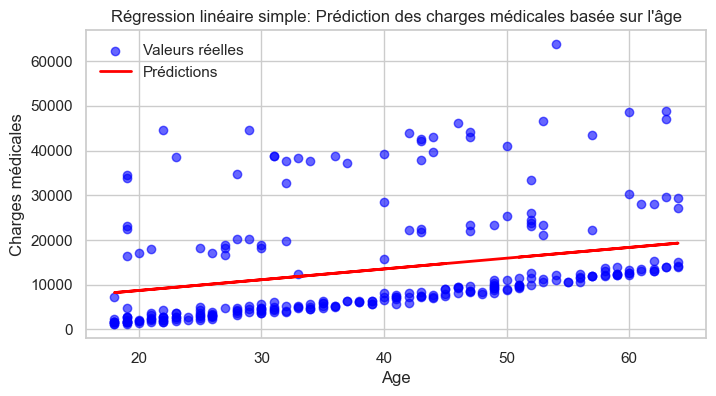

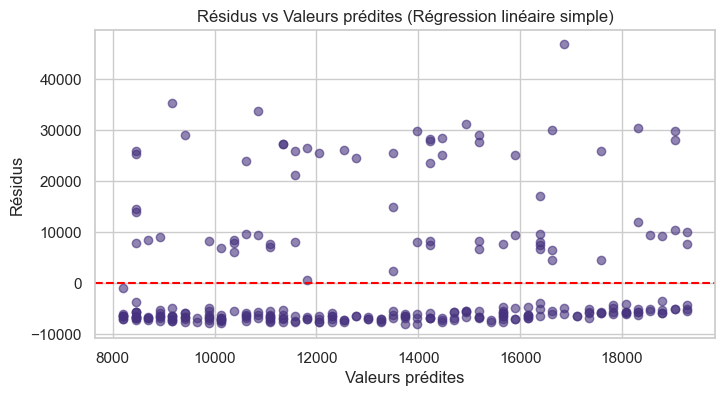

In [15]:
#3-3-6
# Modèle de régression linéaire simple (visualisation, analyse des résidus)

# Visualisation de la régression linéaire simple
plt.figure(figsize=(8, 4))
plt.scatter(X_test["age"], y_test, color='blue', alpha=0.6, label='Valeurs réelles')
plt.plot(X_test["age"], y_pred_simple, color='red', linewidth=2, label='Prédictions')
plt.title("Régression linéaire simple: Prédiction des charges médicales basée sur l'âge")
plt.xlabel('Age')
plt.ylabel('Charges médicales')
plt.legend()
plt.show()

# Analyse des résidus pour le modèle simple
residus_simple = y_test - y_pred_simple
plt.figure(figsize=(8, 4))
plt.scatter(y_pred_simple, residus_simple, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Résidus vs Valeurs prédites (Régression linéaire simple)')
plt.xlabel('Valeurs prédites')
plt.ylabel('Résidus')
plt.show()


In [16]:
#3-3-7
# Modèle 2: Régression linéaire multiple (avec toutes les variables prédictives)

# Entraînement du modèle de régression linéaire multiple
model_multiple = LinearRegression()
model_multiple.fit(X_train, y_train)

# Prédictions sur l'ensemble de test
y_pred_multiple = model_multiple.predict(X_test)

# Évaluation du modèle multiple
mse_multiple = mean_squared_error(y_test, y_pred_multiple)
rmse_multiple = sqrt(mse_multiple)
r2_multiple = r2_score(y_test, y_pred_multiple)

# Affichage des résultats
print("\n=== Résultats du modèle de régression linéaire multiple (avec toutes les variables) ===")
print("Coefficients :")
for feature, coef in zip(X.columns, model_multiple.coef_):
    print(f"  {feature}: {coef:.2f}")
print(f"Constante (ordonnée à l'origine) : {model_multiple.intercept_:.2f}")
print(f"R² (coefficient de détermination) : {r2_multiple:.4f}")
print(f"RMSE (Root Mean Squared Error) : {rmse_multiple:.2f}")



=== Résultats du modèle de régression linéaire multiple (avec toutes les variables) ===
Coefficients :
  age: 256.98
  bmi: 337.09
  children: 425.28
  sex_male: -18.59
  smoker_yes: 23651.13
  region_northwest: -370.68
  region_southeast: -657.86
  region_southwest: -809.80
Constante (ordonnée à l'origine) : -11931.22
R² (coefficient de détermination) : 0.7836
RMSE (Root Mean Squared Error) : 5796.28


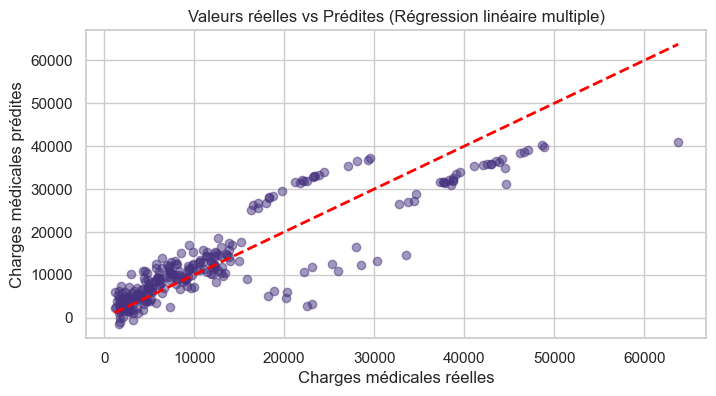

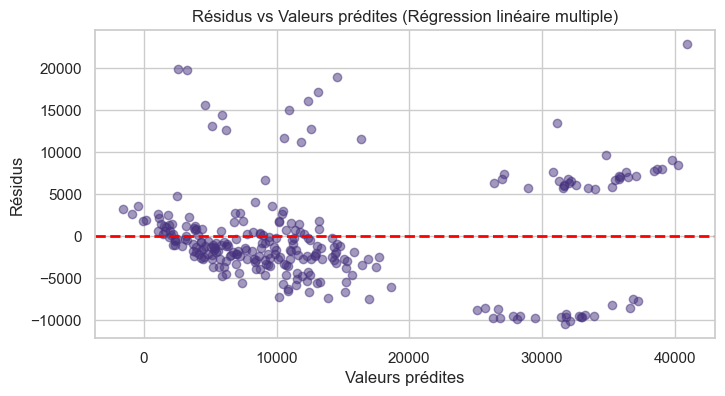

In [17]:
# Visualisation des valeurs réelles vs prédites
plt.figure(figsize=(8, 4))
plt.scatter(y_test, y_pred_multiple, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)  # ligne y=x
plt.title('Valeurs réelles vs Prédites (Régression linéaire multiple)')
plt.xlabel('Charges médicales réelles')
plt.ylabel('Charges médicales prédites')
plt.show()

# Analyse des résidus pour le modèle multiple
residus_multiple = y_test - y_pred_multiple
plt.figure(figsize=(8, 4))
plt.scatter(y_pred_multiple, residus_multiple, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--', linewidth=2)
plt.title('Résidus vs Valeurs prédites (Régression linéaire multiple)')
plt.xlabel('Valeurs prédites')
plt.ylabel('Résidus')
plt.show()


In [18]:
#3-3-8
# Comparaison des performances des modèles
comparison_df = pd.DataFrame({
    'Modèle': ['Régression simple (âge)', 'Régression multiple (toutes variables)'],
    'R²': [r2_simple, r2_multiple],
    'RMSE': [rmse_simple, rmse_multiple]
})

# Arrondir les valeurs pour plus de lisibilité
comparison_df[['R²', 'RMSE']] = comparison_df[['R²', 'RMSE']].round(3)

print("\n=== Comparaison des modèles ===")
display(comparison_df) 


=== Comparaison des modèles ===


,Modèle,R²,RMSE
0,Régression simple (âge),0.124,11661.216
1,Régression multiple (toutes variables),0.784,5796.285


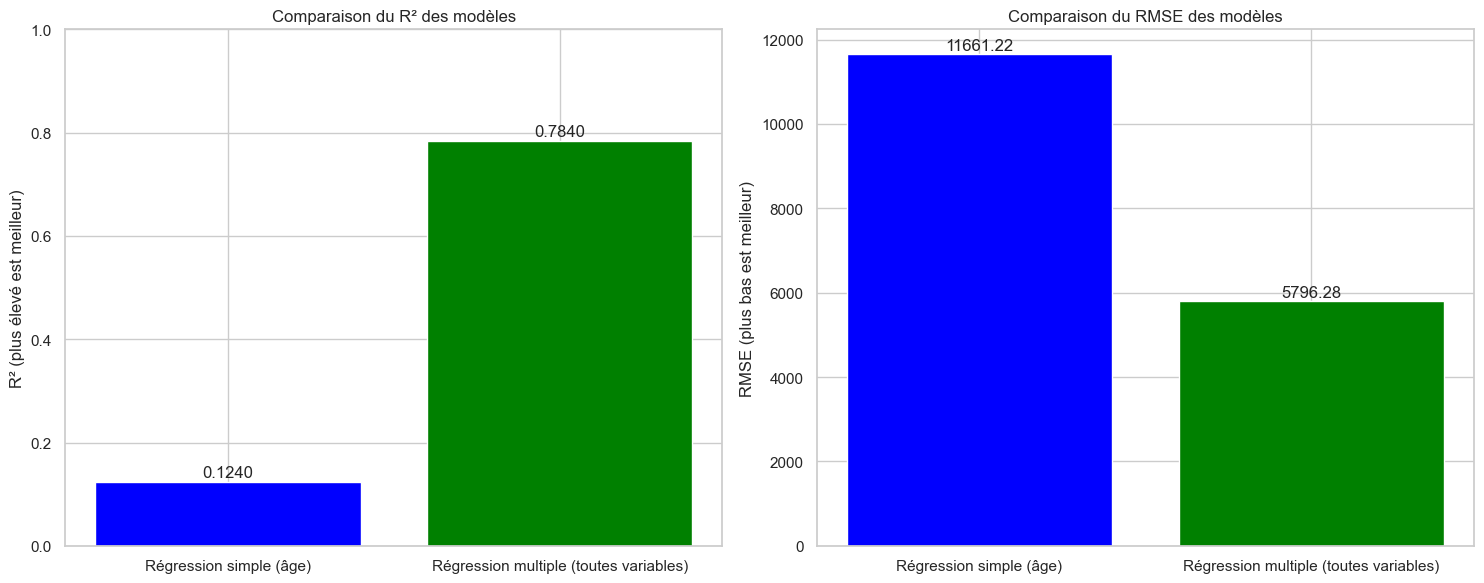

In [19]:
# Visualisation de la comparaison des performances

fig, ax = plt.subplots(1, 2, figsize=(15, 6))

# R²
ax[0].bar(comparison_df['Modèle'], comparison_df['R²'], color=['blue', 'green'])
ax[0].set_title('Comparaison du R² des modèles')
ax[0].set_ylabel('R² (plus élevé est meilleur)')
ax[0].set_ylim([0, 1])
for i, v in enumerate(comparison_df['R²']):
    ax[0].text(i, v + 0.01, f'{v:.4f}', ha="center")

# RMSE
ax[1].bar(comparison_df['Modèle'], comparison_df['RMSE'], color=['blue', 'green'])
ax[1].set_title('Comparaison du RMSE des modèles')
ax[1].set_ylabel('RMSE (plus bas est meilleur)')
for i, v in enumerate(comparison_df['RMSE']):
    ax[1].text(i, v + 100, f'{v:.2f}', ha="center")

plt.tight_layout()
plt.show()

In [20]:
#3-3-9
import numpy as np

## Calcul et analyse des primes d'assurance

# Fonction pour calculer la prime d'assurance
def calculer_prime(charges_predites, marge_securite=0.1, frais_gestion=0.15):
    """
    Calcule la prime d'assurance basée sur les charges prédites.
    
    Args:
        charges_predites: Charges médicales prédites (float, np.array ou pd.Series)
        marge_securite: Marge de sécurité (en pourcentage)
        frais_gestion: Frais de gestion (en pourcentage)
    
    Returns:
        Prime d'assurance calculée (même type que charges_predites)
    """
    charges_predites = np.array(charges_predites)  # supporte scalaires, arrays ou Series
    prime_base = charges_predites
    prime_avec_marge = prime_base * (1 + marge_securite)
    prime_commerciale = prime_avec_marge * (1 + frais_gestion)
    return prime_commerciale


In [21]:
## Tarification

# Calcul des primes avec le meilleur modèle (modèle multiple)
primes = calculer_prime(y_pred_multiple)

# Création d'un DataFrame pour afficher les résultats
resultats_df = pd.DataFrame({
    'Charges_reelles': y_test.values,
    'Charges_predites': y_pred_multiple,
    'Prime_calculee': primes
})

print("\n=== Échantillon des primes calculées ===")
display(resultats_df.head(10))  # plus lisible dans Jupyter

# Statistiques descriptives des primes
print("\nStatistiques descriptives des primes calculées:")
display(resultats_df['Prime_calculee'].describe().round(2))  # arrondi pour plus de clarté



=== Échantillon des primes calculées ===


,Charges_reelles,Charges_predites,Prime_calculee
0,9095.06825,8969.550274,11346.481097
1,5272.17580,7068.747443,8941.965515
2,29330.98315,36858.410912,46625.889803
3,9301.89355,9454.678501,11960.168303
4,33750.29180,26973.173457,34121.064423
5,4536.25900,10864.113164,13743.103153
6,2117.33885,170.280841,215.405264
7,14210.53595,16903.450287,21382.864613
8,3732.62510,1092.430936,1381.925134
9,10264.44210,11218.343184,14191.204127



Statistiques descriptives des primes calculées:


count      268.00
mean     16682.26
std      13613.90
min      -1955.15
25%       6880.51
50%      12867.21
75%      19107.45
max      51764.17
Name: Prime_calculee, dtype: float64

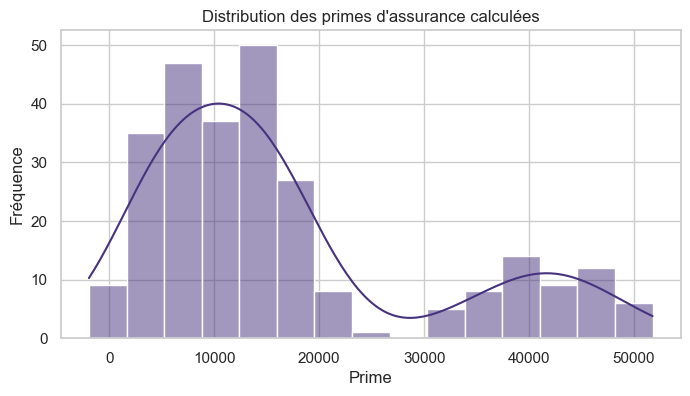

In [22]:
## VISUALISATION DE LA DISTRIBUTION DES PRIMES
plt.figure(figsize=(8, 4))
sns.histplot(resultats_df['Prime_calculee'], kde=True)
plt.title("Distribution des primes d'assurance calculées")
plt.xlabel('Prime')
plt.ylabel('Fréquence')
plt.show()


=== Conclusion ===
La régression linéaire multiple offre de meilleures performances (R² = 0.7836, RMSE = 5796.28) que la régression linéaire simple (R² = 0.1241, RMSE = 11661.22).
Le modèle de régression multiple est donc recommandé pour la tarification en assurance santé.

Importance des variables dans le modèle de régression multiple:


,Variable,Coefficient
4,smoker_yes,23651.13
2,children,425.28
1,bmi,337.09
0,age,256.98
3,sex_male,-18.59
5,region_northwest,-370.68
6,region_southeast,-657.86
7,region_southwest,-809.80


/var/folders/3c/xsgbywt544n50tsfl_r0wpnr0000gn/T/ipykernel_30784/2262427514.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Variable', data=coefficients, palette='Set2')


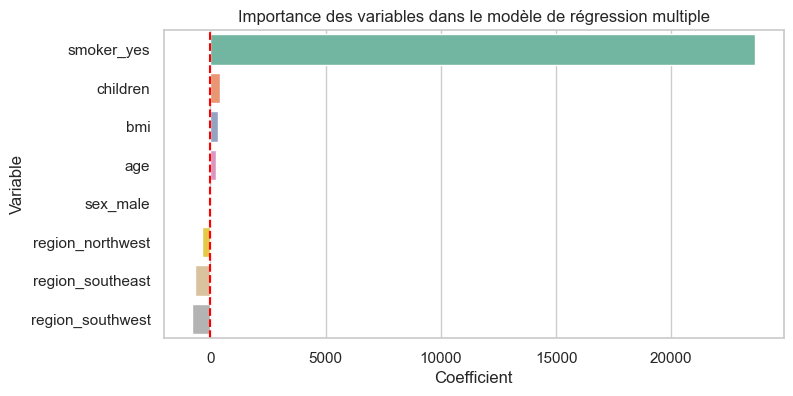


Recommandations pour l'amélioration du modèle:
1. Tester des transformations non linéaires des variables (logarithmiques, polynomiales)
2. Explorer des modèles plus avancés (forêts aléatoires, gradient boosting)
3. Analyser les interactions entre variables (ex: âge x statut de fumeur)
4. Segmenter la population pour créer des modèles spécifiques par groupe


In [23]:
#3-3-10
## Conclusion et recommandations

# Conclusion sur la performance des modèles
print("\n=== Conclusion ===")
if r2_multiple > r2_simple:
    print(f"La régression linéaire multiple offre de meilleures performances "
          f"(R² = {r2_multiple:.4f}, RMSE = {rmse_multiple:.2f}) "
          f"que la régression linéaire simple "
          f"(R² = {r2_simple:.4f}, RMSE = {rmse_simple:.2f}).")
    print("Le modèle de régression multiple est donc recommandé pour la tarification en assurance santé.")
else:
    print(f"La régression linéaire simple offre de meilleures performances "
          f"(R² = {r2_simple:.4f}, RMSE = {rmse_simple:.2f}) "
          f"que la régression linéaire multiple "
          f"(R² = {r2_multiple:.4f}, RMSE = {rmse_multiple:.2f}).")
    print("Le modèle de régression simple est donc recommandé pour la tarification en assurance santé.")

# Importance des variables dans le modèle multiple
coefficients = pd.DataFrame({'Variable': X.columns, 'Coefficient': model_multiple.coef_})
coefficients = coefficients.sort_values(by='Coefficient', ascending=False)
coefficients['Coefficient'] = coefficients['Coefficient'].round(2)

print("\nImportance des variables dans le modèle de régression multiple:")
display(coefficients)

plt.figure(figsize=(8, 4))
sns.barplot(x='Coefficient', y='Variable', data=coefficients, palette='Set2')
plt.title('Importance des variables dans le modèle de régression multiple')
plt.axvline(x=0, color='r', linestyle='--')
plt.show()

# Recommandations pour l'amélioration du modèle
print("\nRecommandations pour l'amélioration du modèle:")
print("1. Tester des transformations non linéaires des variables (logarithmiques, polynomiales)")
print("2. Explorer des modèles plus avancés (forêts aléatoires, gradient boosting)")
print("3. Analyser les interactions entre variables (ex: âge x statut de fumeur)")
print("4. Segmenter la population pour créer des modèles spécifiques par groupe")
